# Multi Document Summarisation based on Statistics and Linguistic treatment.


 + ## Create a list of sentences to be used as nodes in graph.

In [302]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
from math import sqrt
from nltk.corpus import wordnet as wn
import nltk
import re

%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [10]:
                                       
stop = []  

with open("stopwords.txt", "r") as inptr:
    for line in inptr:
        for word in line.split():
            stop.append(word)
            
doc = []  
with open("cnn", "r") as text:
    for line in text:
        doc.append(line.split())

for i in doc:                                   
    for j in i:
        if j in stop:
            i.remove(j)

In [11]:
coll = ['' for x in range(len(doc))]
for line in range(len(doc)):
    for word in range(len(doc[line])):
        #print doc[line][word],
        if len(coll[line]):
            coll[line] = coll[line] + ' ' + doc[line][word]
        else:
            coll[line] = doc[line][word]

* ## Cosine Similiarity.

In [308]:
def cosine_sim(sen1, sen2):
    #sen1 = sen1.strip().split()
    #sen2 = sen2.strip().split()
    #Case Insensitive Cosine Similarity
    count1 = Counter(w.lower() for w in re.findall(r"\w+", sen1))
    count2 = Counter(w.lower() for w in re.findall(r"\w+", sen2))
    intxn = set(count1.keys()) & set(count2.keys())
    num = sum([count1[x] * count2[x] for x in intxn])
    mod1 = sum([count1[x]**2 for x in count1.keys()])
    mod2 = sum([count2[x]**2 for x in count2.keys()])
    den = sqrt(mod1)*sqrt(mod2)
    return float(num)/den

In [310]:
print cosine_sim('yasir Bashir mir is a good boy', 'Yasir umar is also a good boy' )

0.714285714286


* ## Semantic similarity using wordnet ``path_similarity()`` function


In [315]:
def wordnet_score(wrd1, wrd2):
    try:
        syn1 = wn.synset('%s.n.01' %(wrd1))
        syn2 = wn.synset('%s.n.01' %(wrd2))
    except:
        return None
    return wn.path_similarity(syn1,syn2,simulate_root=False)

#Return Sentence similarities with only nouns in sentences

#this thing is imcomplete
def semantic_sim(str1, str2):
    text1 = nltk.word_tokenize(str1)
    text2 = nltk.word_tokenize(str2)
    for (a,b) in nltk.pos_tag(text1):
        print a,b
    for (a,b) in nltk.pos_tag(text2):
        print a,b

In [336]:
#Look for NN NNP NNS tags (noun tokenisation)
semantic_sim("Abraham Lincon was the president of America", "Seberia tigers were once on the verge of extinction")

Abraham NNP
Lincon NNP
was VBD
the DT
president NN
of IN
America NNP
Seberia NNP
tigers NNS
were VBD
once RB
on IN
the DT
verge NN
of IN
extinction NN


* ## Network Graph Generation.

In [140]:
#This is a simple graph for now
#Change this to a multigraph before applying semantic similarity
net = nx.Graph()

In [141]:
net.add_nodes_from(coll)

In [142]:
net.nodes()

['workers protesting labor reform bill put forward the government will make easier companies hire fire employees',
 'people now hoarding gas worried it be time supply levels back normal',
 'scenes being played across country friday unions called workers step protests have the past week crippled parts france',
 'french prime minister manuel valls told local media thursday he be modify of proposals giving hope to french people the protests fuel shortages soon stop',
 'governments argument strict laws that make french workers the protected the world leave companies a difficult position they take new staff',
 'burning tires tear gas clashes riot police ugly scenes come workers strikes all familiar france country constantly to balance culture workers rights a efficient economy',
 'employees oil refineries nuclear power plants some public transportation left in gas stations dry forcing vehicles search well stocked stations causing long lines the pump',
 'governments violent words contempt th

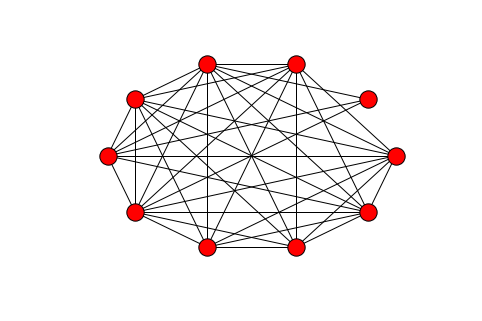

In [147]:
nx.draw_circular(net)

In [337]:
for i in net.nodes():
    for j in net.nodes():
        if (cosine_sim(i,j)):
            net.add_edge(i,j, weight = cosine_sim(i,j))
        print cosine_sim(i,j)


1.0
0.0
0.117851130198
0.0481125224325
0.260643017571
0.0962250448649
0.0962250448649
0.133630620956
0.129099444874
0.200445931434
0.0
1.0
0.0
0.111111111111
0.0
0.0555555555556
0.0555555555556
0.0
0.0
0.0
0.117851130198
0.0
1.0
0.0907218423253
0.147441956155
0.226804605813
0.0453609211627
0.0629940788349
0.304290309725
0.314970394174
0.0481125224325
0.111111111111
0.0907218423253
1.0
0.160514470781
0.037037037037
0.037037037037
0.0514344499874
0.198761598
0.0514344499874
0.260643017571
0.0
0.147441956155
0.160514470781
1.0
0.120385853086
0.0802572353905
0.167183463773
0.215352760823
0.22291128503
0.0962250448649
0.0555555555556
0.226804605813
0.037037037037
0.120385853086
1.0
0.037037037037
0.0
0.0
0.154303349962
0.0962250448649
0.0555555555556
0.0453609211627
0.037037037037
0.0802572353905
0.037037037037
1.0
0.0514344499874
0.1490711985
0.0514344499874
0.133630620956
0.0
0.0629940788349
0.0514344499874
0.167183463773
0.0
0.0514344499874
1.0
0.138013111868
0.142857142857
0.12909944487

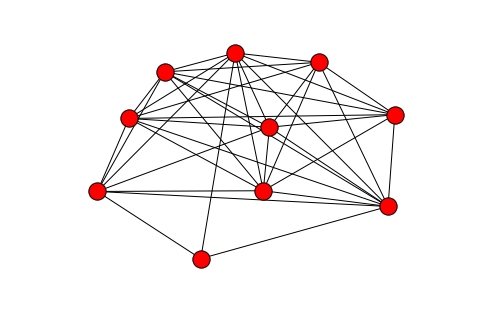

In [257]:
nx.draw(net)

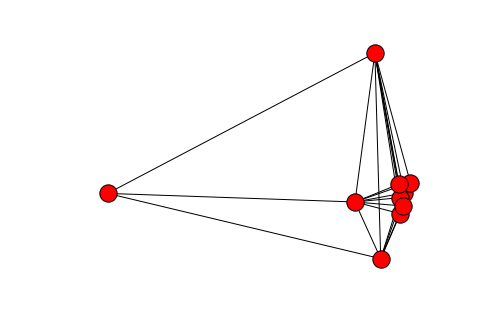

In [258]:
nx.draw_spectral(net)

In [246]:
#Raw code for sentence scoring using semantic similarity

def wordnet_score(wrd1, wrd2):
    try:
        syn1 = wn.synset('%s.n.01' %(wrd1))
        syn2 = wn.synset('%s.n.01' %(wrd2))
    except:
        return None
    return wn.path_similarity(syn1,syn2,simulate_root=False)

    

In [230]:
wn.wup_similarity(dog,cat)

0.5217391304347826

In [231]:
wn.path_similarity(dog,cat)

0.08333333333333333

In [327]:
print(wn.morphy('playing', wn.VERB))

play


In [261]:
s1 = 'grape'
s2 = 'garden'
print wordnet_score(s1,s2)

0.0714285714286


In [267]:
nltk.tag.pos_tag(['i', 'am', 'a', 'good', 'boy', 'named', 'adam', 'sandler'])

[('i', 'NN'),
 ('am', 'VBP'),
 ('a', 'DT'),
 ('good', 'JJ'),
 ('boy', 'NN'),
 ('named', 'VBN'),
 ('adam', 'JJ'),
 ('sandler', 'NN')]

In [283]:
nltk.tag.pos_tag(['the', 'summer', 'of', 'sixty', 'nine', 'bryan', 'adams'])

[('the', 'DT'),
 ('summer', 'NN'),
 ('of', 'IN'),
 ('sixty', 'JJ'),
 ('nine', 'CD'),
 ('bryan', 'JJ'),
 ('adams', 'NNS')]

In [312]:
text = nltk.word_tokenize("the summer of sixty nine Bryan Adams")
for (a,b) in nltk.pos_tag(text):
      print b


DT
NN
IN
JJ
CD
NNP
NNP
